In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings('ignore')

In [2]:
empdf = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
empdf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
print("Dataset Shape:",empdf.shape)
print("Dataset Columns:",empdf.columns)

Dataset Shape: (1470, 35)
Dataset Columns: Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [4]:
empdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

many columns with categorical data and numerical data as well, seemingly no null values as Non numm are all same as shape[0] of the dataset. Which is a good thing.

# Let's do some univariate analysis

In [5]:
empdf.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

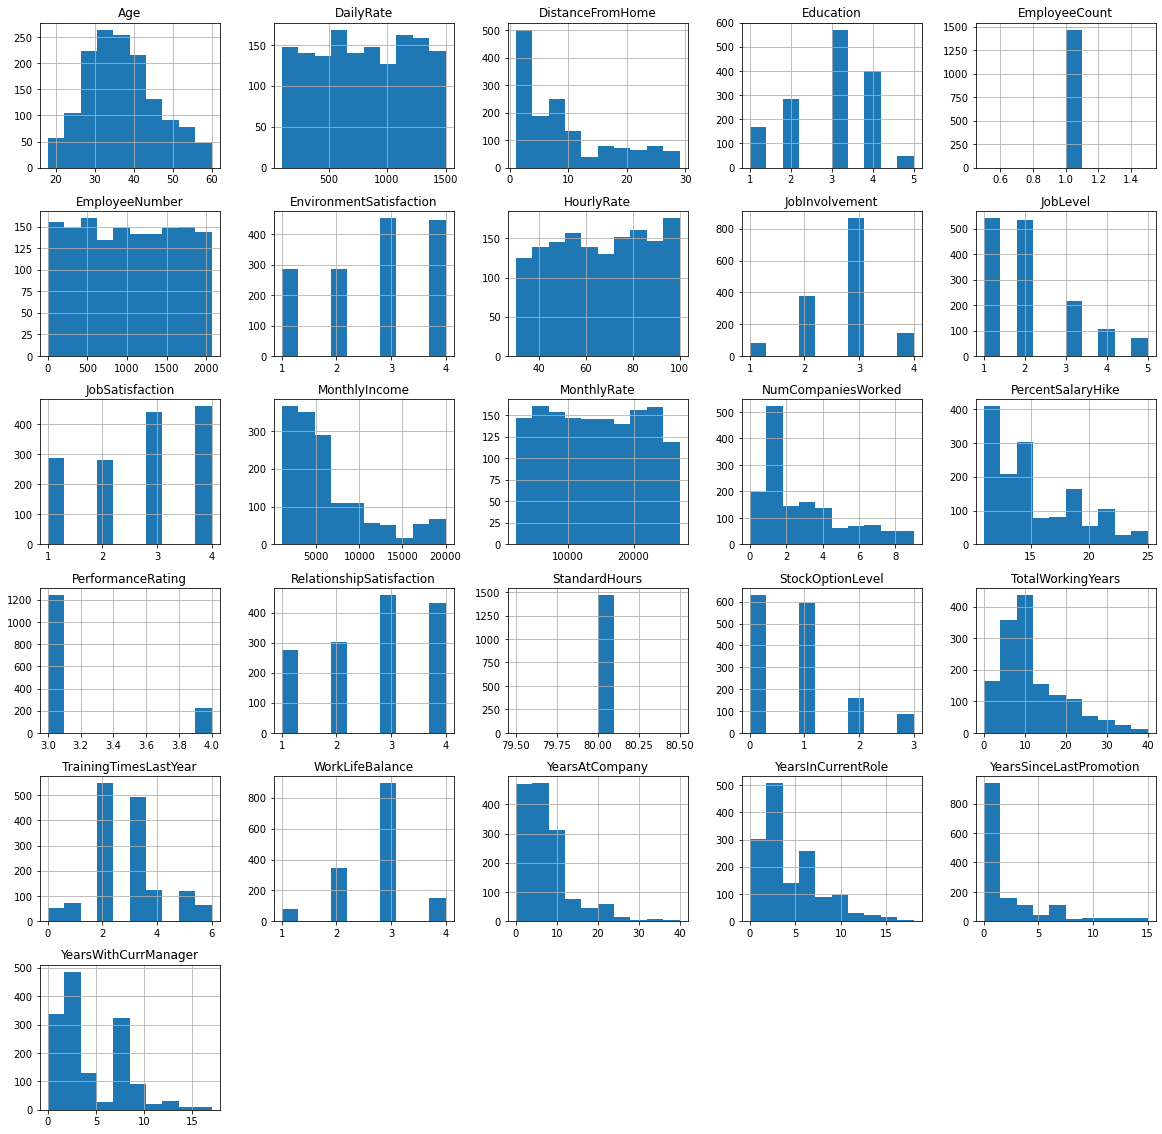

In [6]:
empdf.hist(figsize=(20,20))
plt.show()

Let's do some more plotting

In [7]:
arr = [i for i in empdf.columns if empdf[i].dtype != 'object']
print(len(arr))
arr1 = arr[:-1]
arr1
empdf['YearsSinceLastPromotion']

26


0       0
1       1
2       0
3       3
4       2
       ..
1465    0
1466    1
1467    0
1468    0
1469    1
Name: YearsSinceLastPromotion, Length: 1470, dtype: int64

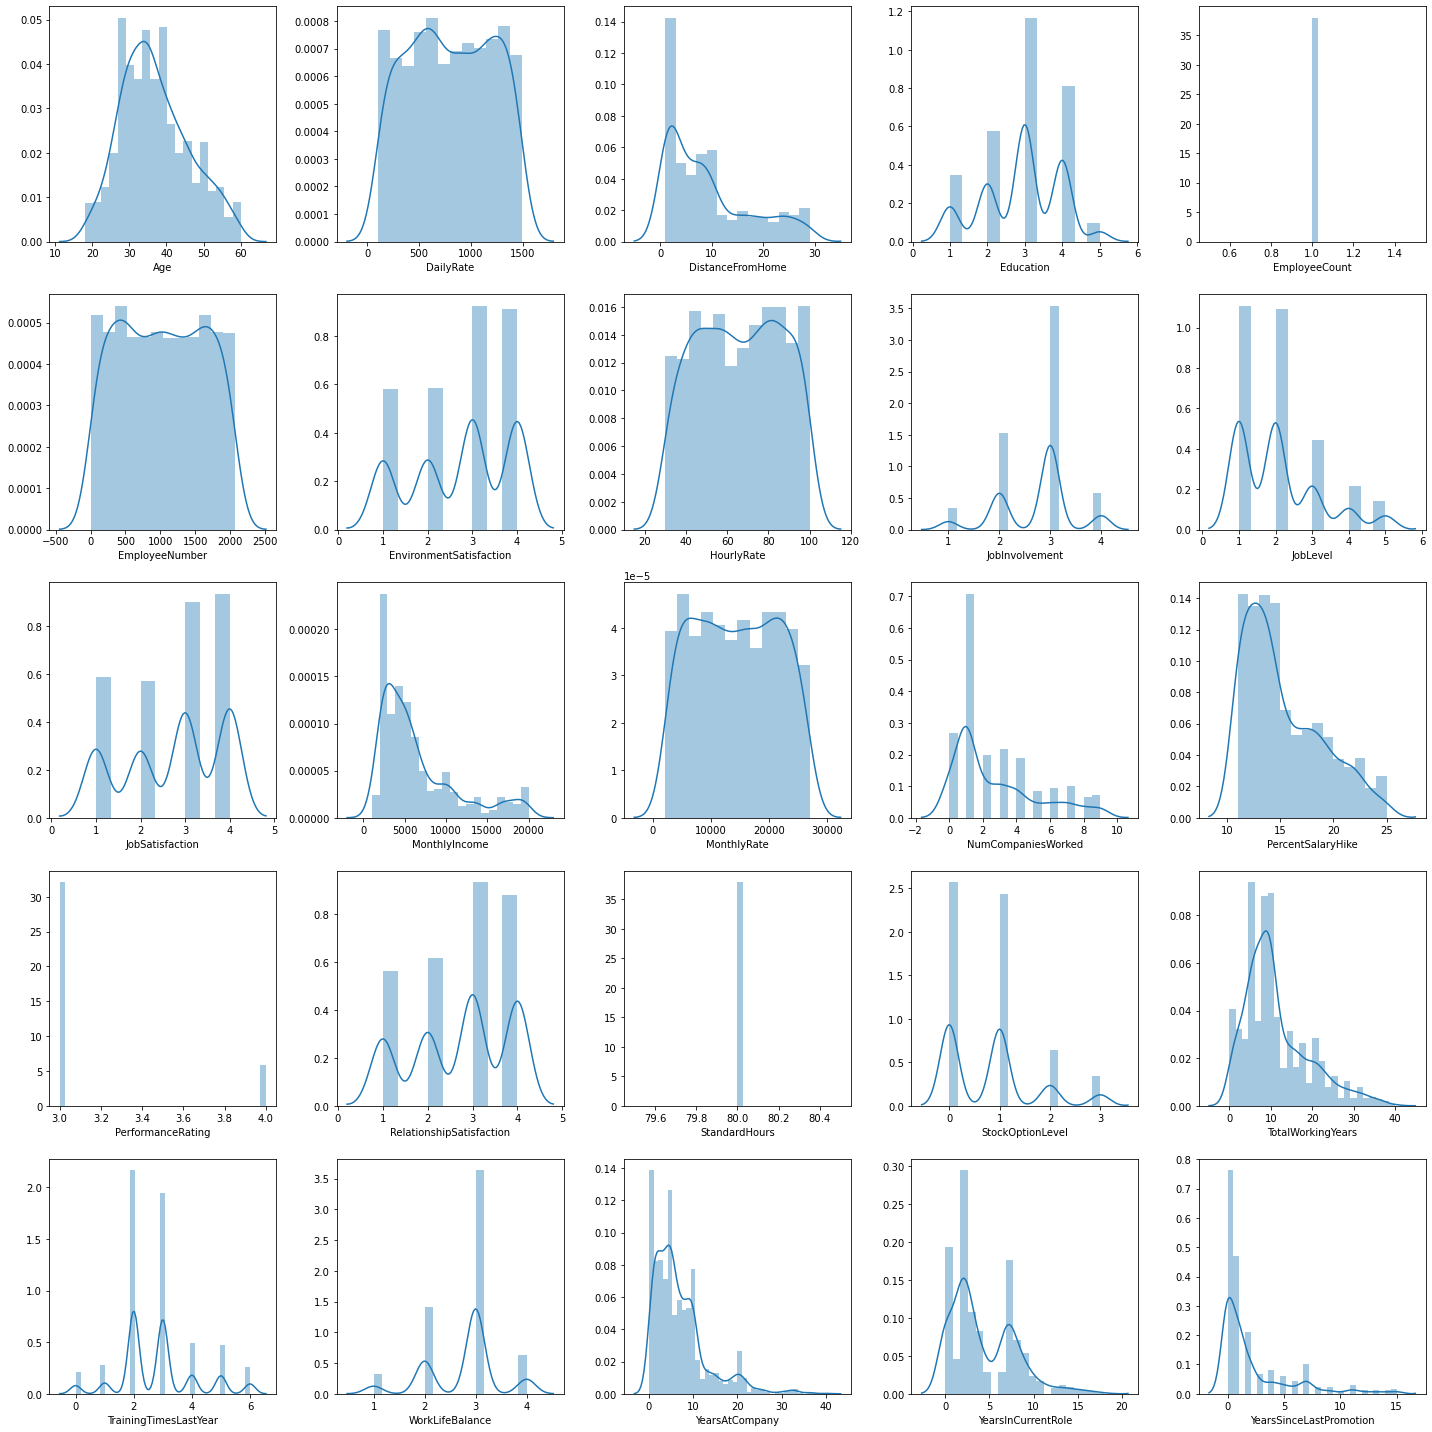

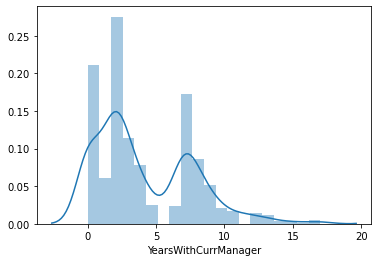

In [8]:
plt.figure(figsize=(20,20))
for i,j in enumerate(arr1):
    if empdf[j].dtype != 'object':
        plt.subplot(5,5,i+1)
        sns.distplot(empdf[j])
        plt.tight_layout()
plt.show()
sns.distplot(empdf[arr[-1]])

In [9]:
print(empdf['EmployeeCount'].value_counts())
print(empdf['StandardHours'].value_counts())

1    1470
Name: EmployeeCount, dtype: int64
80    1470
Name: StandardHours, dtype: int64


There is only column age which is normally distributed maximum in 25-45 years of age.

Almost all columns are skewed, which means we need to transform the data. Employee count and Standard hours are single value columns. 


Distance from home is right skeewd, which means large number of employees live near company.


Different values in daily rate is almost equal, which means same salaried employees in every salary group(low, medium and high) are almost equal. Also there is a huge pay scale groups.


Hourly rate amd hourly rate is also dependent on Daily rate, (no-brainer).


Higher educated and low educated employees are also less, majority employees are medium educated.


Employee number seems some kind of unique value to each employee.


Employee satisfaction seems to be good as higher satisfaction levels are having highr frequency.


High Monthly income employees are very less as compared to low income employees


Salary hike percent also seems on lower side more, means low salary hike has happened with far more employees as compared to number of employees with good salary hike.


There are more than 800 employees who are promoted within a year, but there are employees who are not promoted since 3-15 years.
Training time is also pretty normalized.

# Bivariate analysis

In [10]:
empdf.loc[empdf['Attrition'] == 'Yes', 'Gender'].count()

237

In [11]:
nml = empdf.loc[(empdf['Attrition'] == 'Yes') & (empdf['Gender'] == 'Male'), 'Gender'].count()
nfl = empdf.loc[(empdf['Attrition'] == 'Yes') & (empdf['Gender'] == 'Female'), 'Gender'].count()
print("Number of Male employees left are:",nml)
print("Number of Female employees left are:",nfl)

Number of Male employees left are: 150
Number of Female employees left are: 87


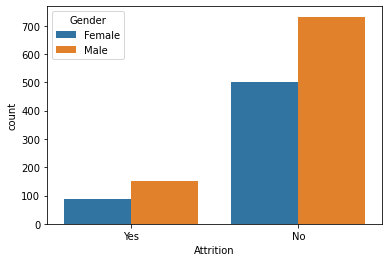

In [12]:
sns.countplot(empdf['Attrition'], hue=empdf['Gender'])

In [13]:
empdf['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [14]:
#Let's see what percet of male left and what percent of females left
nm = empdf.loc[empdf['Gender'] == 'Male', 'Gender'].count()
nf = empdf.loc[empdf['Gender'] == 'Female', 'Gender'].count()
mpl = (nml/nm)*100
fpl = (nfl/nf)*100
print("Percent of Males left are:", mpl)
print("Percent of Females left are:", fpl)

Percent of Males left are: 17.006802721088434
Percent of Females left are: 14.795918367346939


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
le = LabelEncoder()

In [17]:
empdf.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [18]:
empdf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [19]:
empdf.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Relation between variables

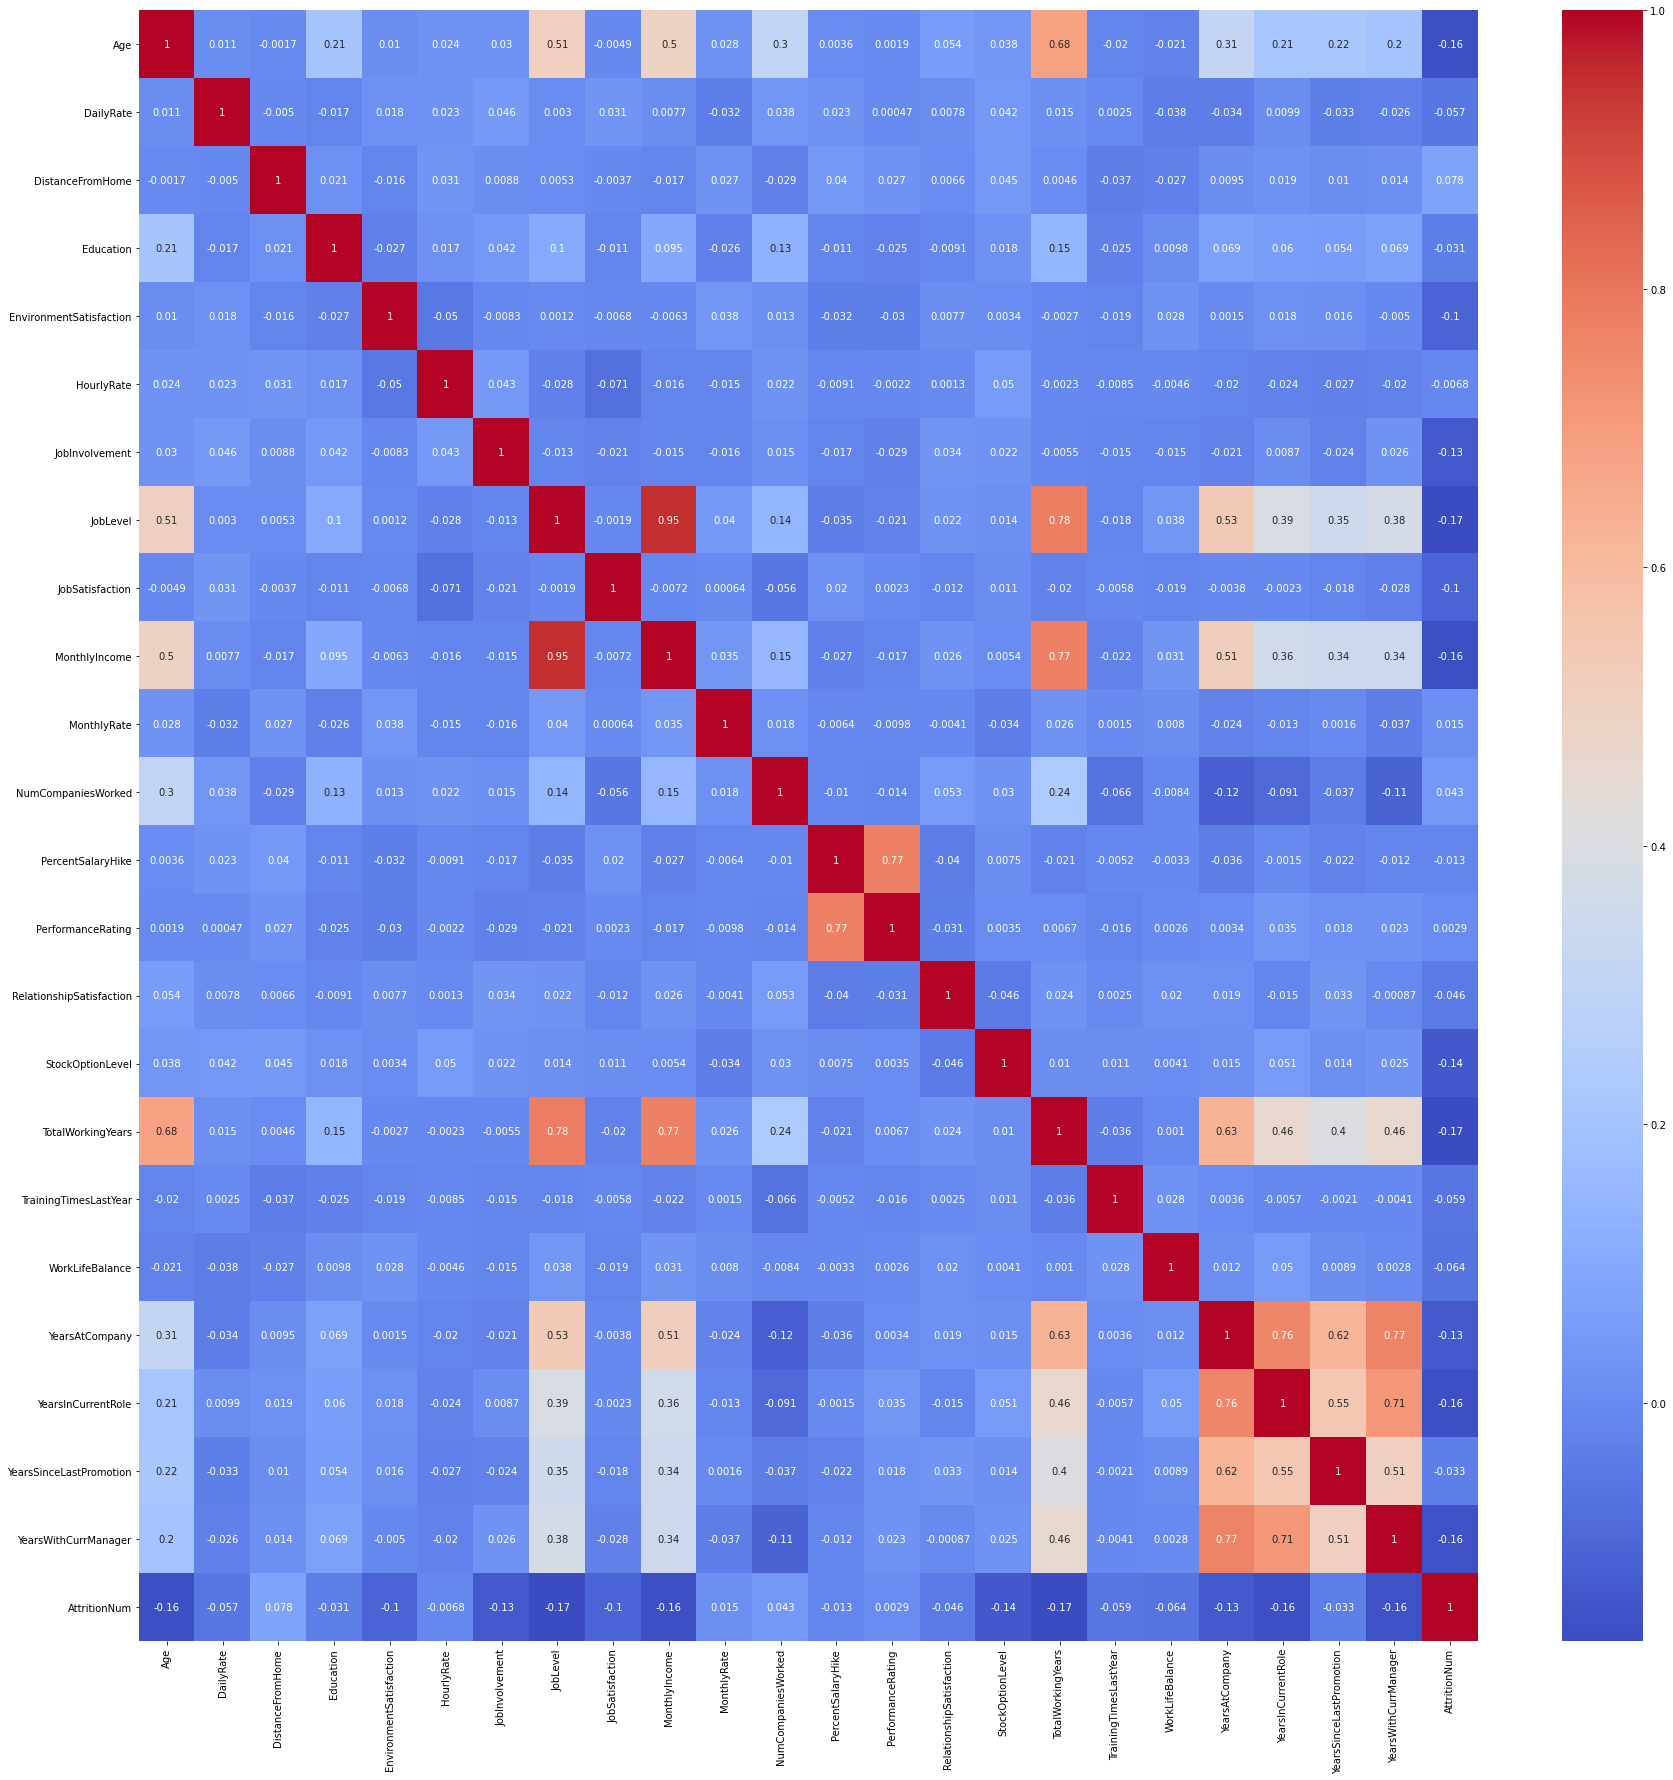

In [20]:
empdf.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"],1,inplace=True)
empdf['AttritionNum'] = le.fit_transform(empdf['Attrition'])
plt.figure(figsize=(30,30))
sns.heatmap(empdf.corr(), annot=True, cmap='coolwarm')
plt.show()

We can see negative correlation with EnvironmentSatisfaction, JobSatisfaction, JobInvolvement, YearsAtCompany, StockOptionLevel, YearsWithCurrManager, Age, MonthlyIncome, YearsInCurrentRole, JobLevel, TotalWorkingYears

We can also see that nothing really relates positively with Attrition

In [21]:
arr = [i for i in empdf.columns if empdf[i].dtype == 'object' and len(list(empdf[i].unique())) <= 2]
dict1 = []
for i in arr:
    empdf[i] = le.fit_transform(empdf[i])
    dict1.append({key: value for key,value in enumerate(le.classes_)})
    print("Columns are:",i)

dict1

Columns are: Attrition
Columns are: Gender
Columns are: OverTime


[{0: 'No', 1: 'Yes'}, {0: 'Female', 1: 'Male'}, {0: 'No', 1: 'Yes'}]

Let's see once again correlation

In [22]:
empdf.drop('AttritionNum',1,inplace=True)

In [23]:
empdf.corr().sort_values(by='Attrition', ascending=False)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
OverTime,0.028062,0.246118,0.009135,0.025514,-0.020322,0.070132,-0.041924,-0.007782,-0.003507,0.000544,...,0.004369,0.048493,-0.000449,0.012754,-0.079113,-0.027092,-0.011687,-0.029758,-0.012239,-0.041586
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,-0.001851,0.031131,0.008783,0.005303,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
NumCompaniesWorked,0.299635,0.043494,0.038153,-0.029251,0.126317,0.012594,-0.039147,0.022157,0.015012,0.142501,...,-0.014095,0.052733,0.030075,0.237639,-0.066054,-0.008366,-0.118421,-0.090754,-0.036814,-0.110319
Gender,-0.036311,0.029453,-0.011716,-0.001851,-0.016547,0.000508,1.000000,-0.000478,0.017960,-0.039403,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599
MonthlyRate,0.028051,0.015170,-0.032182,0.027473,-0.026084,0.037600,-0.041482,-0.015297,-0.016322,0.039563,...,-0.009811,-0.004085,-0.034323,0.026442,0.001467,0.007963,-0.023655,-0.012815,0.001567,-0.036746
PerformanceRating,0.001904,0.002889,0.000473,0.027110,-0.024539,-0.029548,-0.013859,-0.002172,-0.029071,-0.021222,...,1.000000,-0.031351,0.003506,0.006744,-0.015579,0.002572,0.003435,0.034986,0.017896,0.022827
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,-0.000478,1.000000,0.042861,-0.027853,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
PercentSalaryHike,0.003634,-0.013478,0.022704,0.040235,-0.011111,-0.031701,0.002733,-0.009062,-0.017205,-0.034730,...,0.773550,-0.040490,0.007528,-0.020608,-0.005221,-0.003280,-0.035991,-0.001520,-0.022154,-0.011985
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,-0.016547,0.016775,0.042438,0.101589,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065


Attrition is positively related to OverTime(strongest), DistanceFromHome, NumCompaniesWorked, MonthlyRate, PerformanceRating

In [24]:
empdf.dtypes

Age                          int64
Attrition                    int32
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                       int32
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                     int32
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [25]:
empdf = pd.get_dummies(empdf, drop_first=True)
empdf.dtypes

Age                                  int64
Attrition                            int32
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EnvironmentSatisfaction              int64
Gender                               int32
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
OverTime                             int32
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurr

In [26]:
empdf.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,2.721769,0.600000,65.891156,2.729932,2.063946,...,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.457823,0.319728
std,9.135373,0.367863,403.509100,8.106864,1.024165,1.093082,0.490065,20.329428,0.711561,1.106940,...,0.184786,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.498387,0.466530
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,0.000000,48.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,3.000000,1.000000,66.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,4.000000,1.000000,83.750000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,1.000000,100.000000,4.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


There are some columns whose magnitude covers a large range on number scale, we can scale them, since almost every varying columns are differently varied, some are varying from 18-60, while some from 102-1499, so we shall choose more uniform scalig which will be minmaxscaling

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for i in empdf.columns:
    if i != 'Attrition':
        empdf[[i]] = scaler.fit_transform(empdf[[i]])

empdf.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.450567,0.161224,0.501421,0.292590,0.478231,0.573923,0.600000,0.512731,0.576644,0.265986,...,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.457823,0.319728
std,0.217509,0.367863,0.288840,0.289531,0.256041,0.364361,0.490065,0.290420,0.237187,0.276735,...,0.184786,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.498387,0.466530
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.000000,0.259843,0.035714,0.250000,0.333333,0.000000,0.257143,0.333333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.428571,0.000000,0.501074,0.214286,0.500000,0.666667,1.000000,0.514286,0.666667,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.595238,0.000000,0.755190,0.464286,0.750000,1.000000,1.000000,0.767857,0.666667,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Ourdataset is now chic and uniform

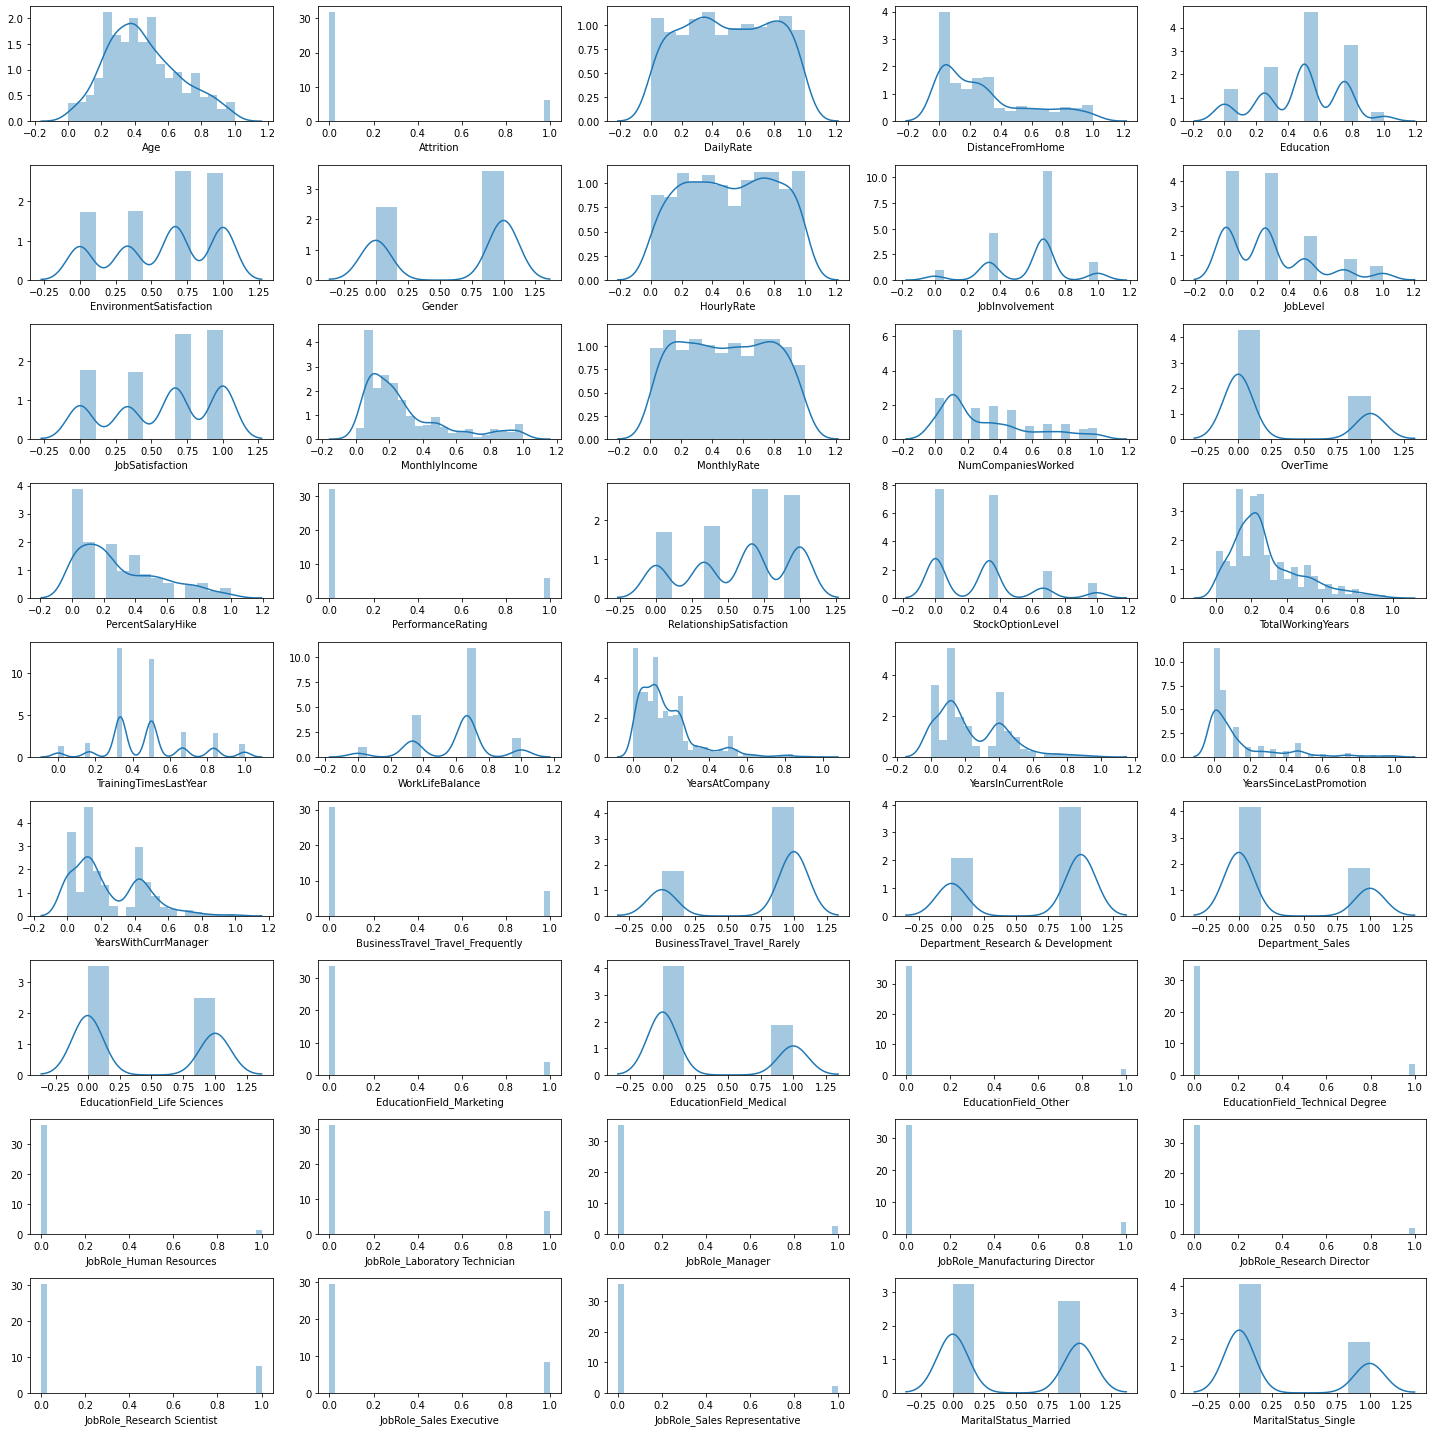

In [28]:
plt.figure(figsize=(20,20))
for i,j in enumerate(empdf.columns):
    plt.subplot(9,5,i+1)
    sns.distplot(empdf[j])
    plt.tight_layout()

In [29]:
empdf['Age'].skew()

0.41328630185633414

In [30]:
empdf['MonthlyIncome'].skew()

1.3698166808390664

In [31]:
for i in empdf.columns:
    if i != 'Attrition' and empdf[i].skew() > 0.5:
        empdf[[i]] = np.log(1+empdf[[i]])

empdf.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.450567,0.161224,0.501421,0.233806,0.478231,0.573923,0.600000,0.512731,0.576644,0.214079,...,0.024519,0.122126,0.048096,0.068372,0.037722,0.137686,0.153718,0.039137,0.457823,0.221618
std,0.217509,0.367863,0.288840,0.209107,0.256041,0.364361,0.490065,0.290420,0.237187,0.204454,...,0.128084,0.264167,0.176197,0.206751,0.157293,0.276643,0.288057,0.160042,0.498387,0.323374
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.000000,0.259843,0.035091,0.250000,0.333333,0.000000,0.257143,0.333333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.428571,0.000000,0.501074,0.194156,0.500000,0.666667,1.000000,0.514286,0.666667,0.223144,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.595238,0.000000,0.755190,0.381368,0.750000,1.000000,1.000000,0.767857,0.666667,0.405465,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.693147
max,1.000000,1.000000,1.000000,0.693147,1.000000,1.000000,1.000000,1.000000,1.000000,0.693147,...,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,1.000000,0.693147


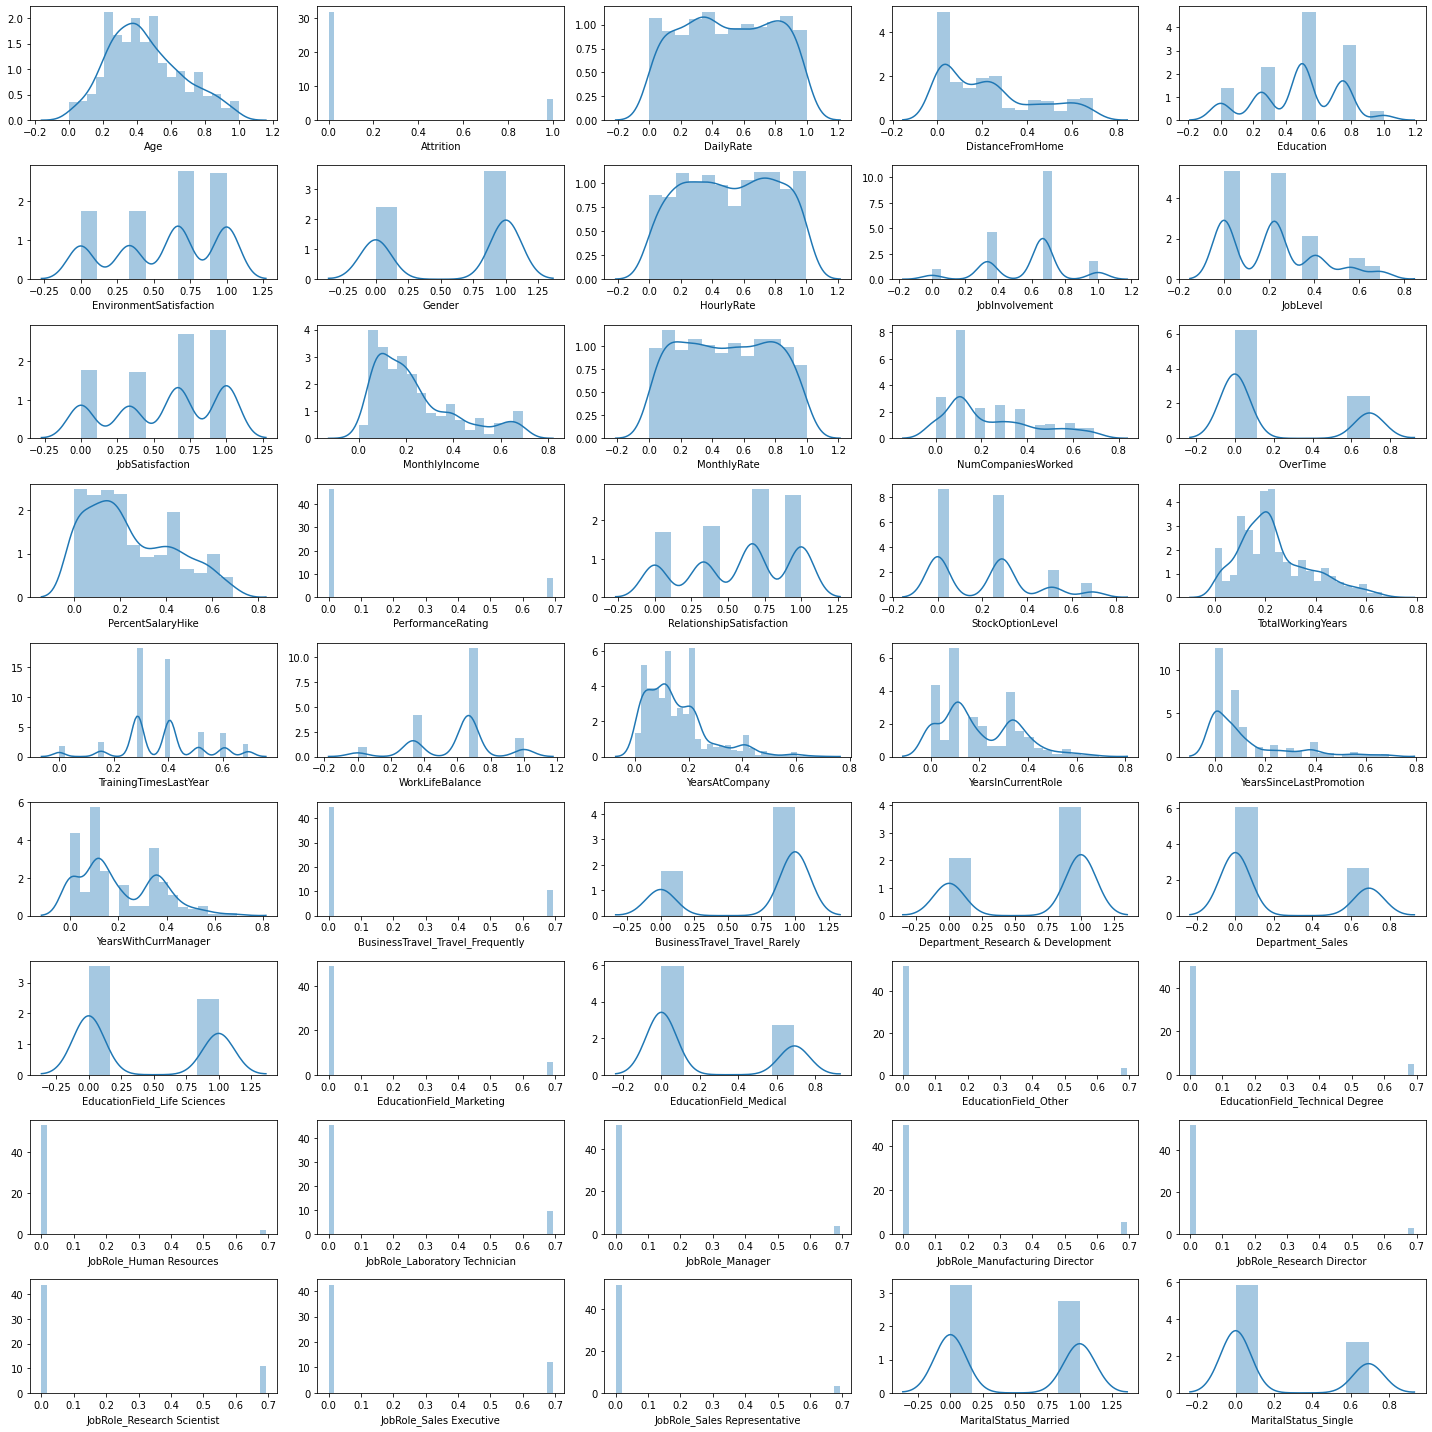

In [32]:
plt.figure(figsize=(20,20))
for i,j in enumerate(empdf.columns):
    plt.subplot(9,5,i+1)
    sns.distplot(empdf[j])
    plt.tight_layout()

In [33]:
empdf['MonthlyIncome'].skew()

1.0821904420216064

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X = empdf.drop("Attrition",1)
Y = empdf['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=7, stratify=empdf['Attrition'])

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report, auc, roc_auc_score, roc_curve, f1_score, accuracy_score, roc_auc_score, make_scorer

In [36]:
lm = LogisticRegression()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
gnc = GaussianNB()
svc = SVC()
rfc = RandomForestClassifier()
xbc = XGBClassifier()
models = [lm, dtc, knc, gnc, svc, rfc]
modelname = ['Logistic Regression', 'DecisionTree Classification',
             'KNeighbors Classification', 'Gaussian NB',
             'SVC', 'RandomForestClassifier']

In [37]:
score_table = pd.DataFrame(columns=['Model Name', 'Accuracy Score Mean', 'ROC AUC Score Mean'])
for i,j in enumerate(models):
    cv_acc_score = cross_val_score(j, X_train, y_train, cv=5, scoring='accuracy')
    cv_roc_auc_score = cross_val_score(j, X_train, y_train, cv=5, scoring='roc_auc')
    score_table.loc[i] = [modelname[i], np.mean(cv_acc_score), np.mean(cv_roc_auc_score)]

score_table.sort_values(by='Accuracy Score Mean', ascending=False)

,Model Name,Accuracy Score Mean,ROC AUC Score Mean
0,Logistic Regression,0.880218,0.826660
4,SVC,0.856627,0.819530
5,RandomForestClassifier,0.854813,0.793346
2,KNeighbors Classification,0.846639,0.640023
1,DecisionTree Classification,0.775870,0.601026
3,Gaussian NB,0.679667,0.758812


Logistic Regression is the best potential Model for this Dataset

Let's tune its hyper parameters and see if we can get some more accuracy

In [38]:
lmparams = {'C': [0.0001, 0.001, 0.01, 0.1, 1.0]}
lmgs = GridSearchCV(lm, lmparams,return_train_score = False, cv = 5, scoring='roc_auc')
lmgs.fit(X_train, y_train)
lmDF = pd.DataFrame(lmgs.cv_results_)
lmDF['mean_test_score'] = np.abs(lmDF['mean_test_score'])
lmDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,params,mean_test_score
4,{'C': 1.0},0.826660
3,{'C': 0.1},0.812261
2,{'C': 0.01},0.780280
1,{'C': 0.001},0.765723
0,{'C': 0.0001},0.763598


In [39]:
lm_model = lmgs.fit(X_train, y_train).best_estimator_
pred = lm_model.predict(X_test)

In [40]:
confusion_matrix(pred, y_test)

array([[304,  35],
       [  5,  24]], dtype=int64)

In [41]:
print(classification_report(pred, y_test))
print(accuracy_score(pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       339
           1       0.41      0.83      0.55        29

    accuracy                           0.89       368
   macro avg       0.70      0.86      0.74       368
weighted avg       0.94      0.89      0.91       368

0.8913043478260869


In [42]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

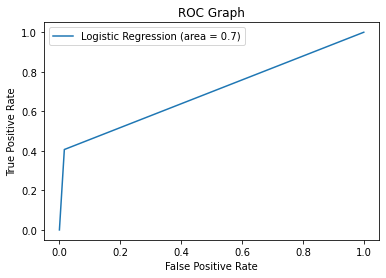

In [43]:
plt.plot(fpr, tpr, label='Logistic Regression (area = {})' .format(round(roc_auc_score(y_test, pred),2)))
plt.legend(loc="top left")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.show()

In [44]:
import pickle as pk
with open('Evaluation_Pickle', 'wb') as f:
    pk.dump(lm_model,f)